# Importing Modules

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the dataset

In [83]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analyzing the data

<Axes: xlabel='Survived', ylabel='count'>

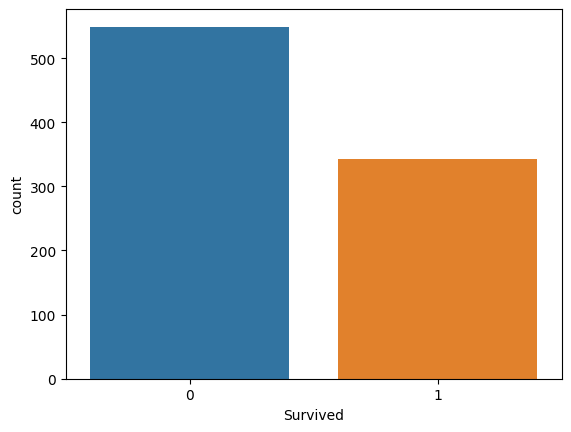

In [86]:
### Categorical Analysis
sns.countplot(x='Survived', data=train)


<Axes: xlabel='Survived', ylabel='count'>

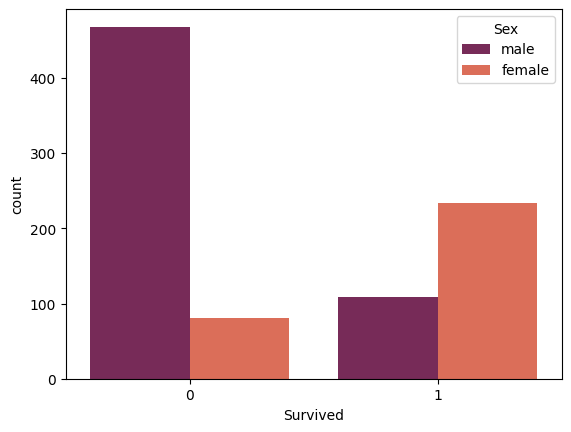

In [87]:
sns.countplot(x='Survived', hue='Sex', data=train, palette="rocket")

<Axes: xlabel='Survived', ylabel='count'>

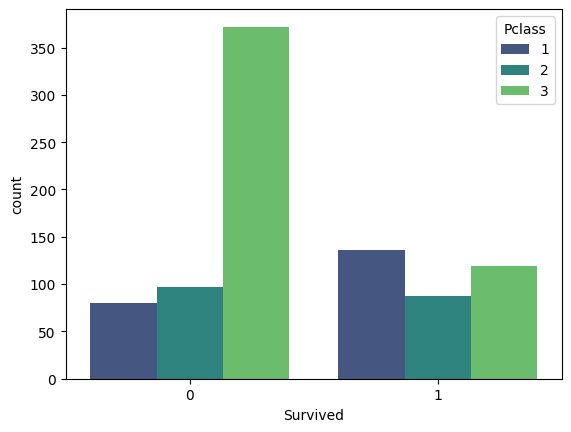

In [88]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='viridis')

<Axes: xlabel='SibSp', ylabel='count'>

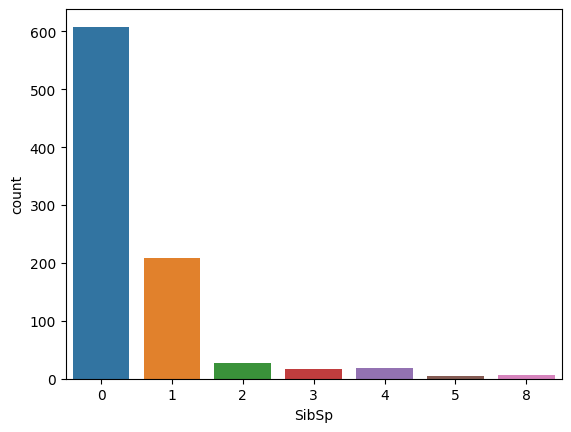

In [89]:
sns.countplot(x='SibSp', data=train)

<Axes: xlabel='Parch', ylabel='count'>

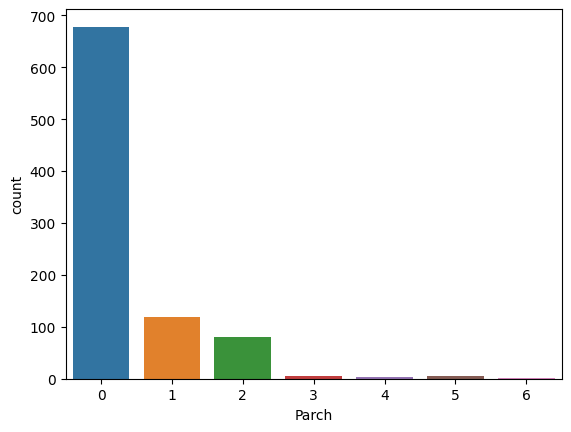

In [90]:
sns.countplot(x='Parch', data=train)

<Axes: xlabel='Embarked', ylabel='count'>

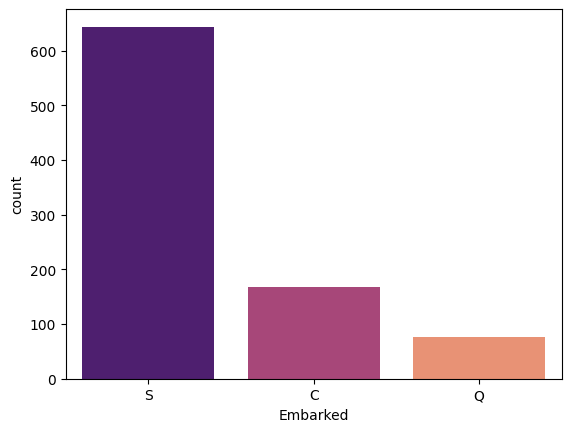

In [91]:
sns.countplot(x='Embarked', data=train, palette='magma')

Text(0.5, 0, 'Age')

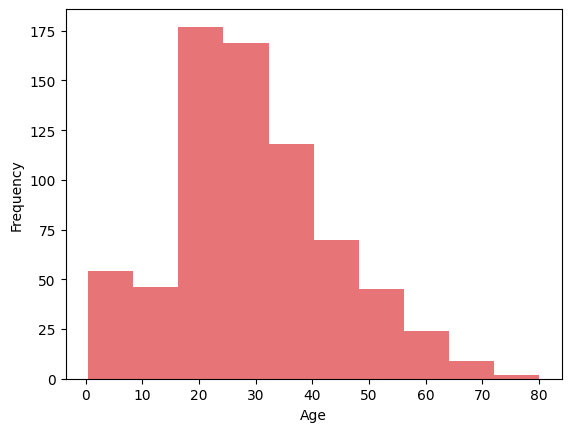

In [92]:
train['Age'].plot.hist(color="#e77577")
plt.xlabel('Age')

Text(0.5, 0, 'Fare')

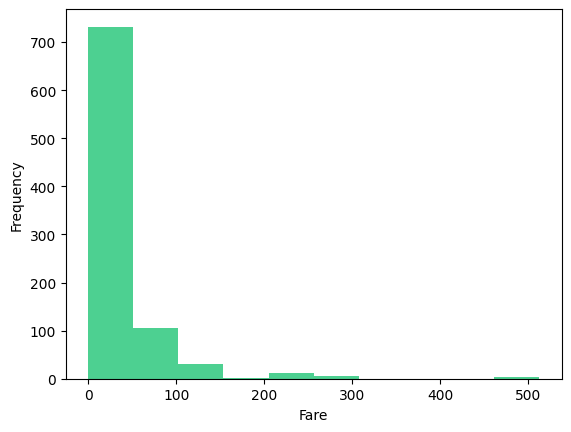

In [93]:
train['Fare'].plot.hist(color="#4dd091")
plt.xlabel('Fare')

<Axes: xlabel='Age', ylabel='Density'>

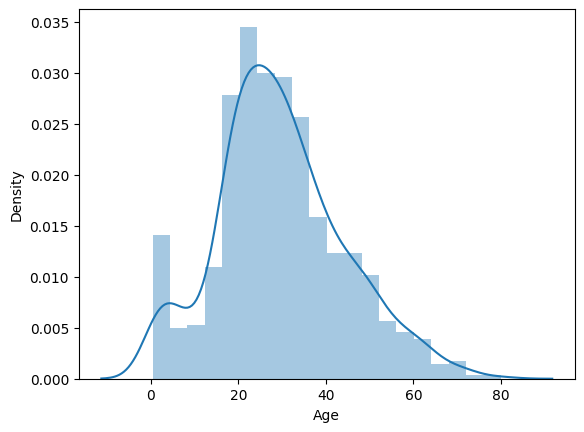

In [94]:
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

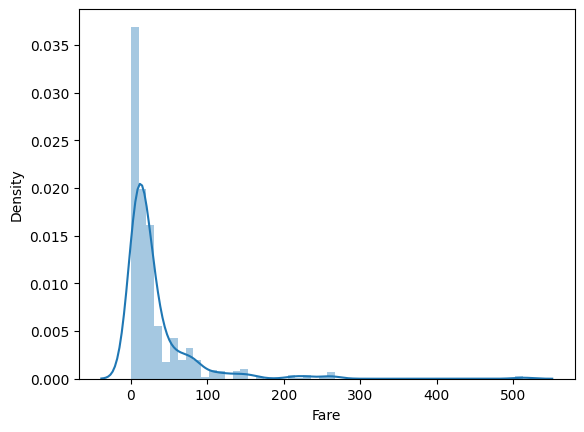

In [95]:
sns.distplot(train['Fare'])

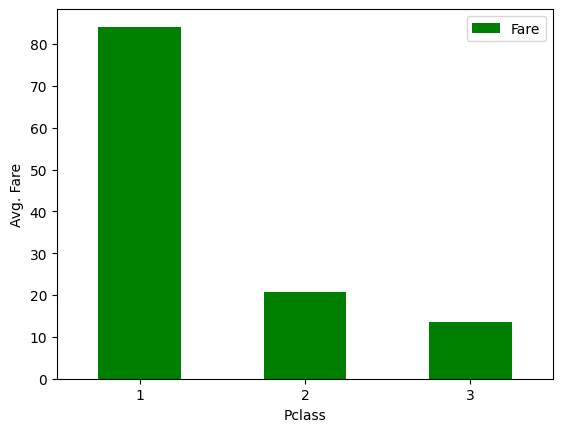

In [96]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar', color='green')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

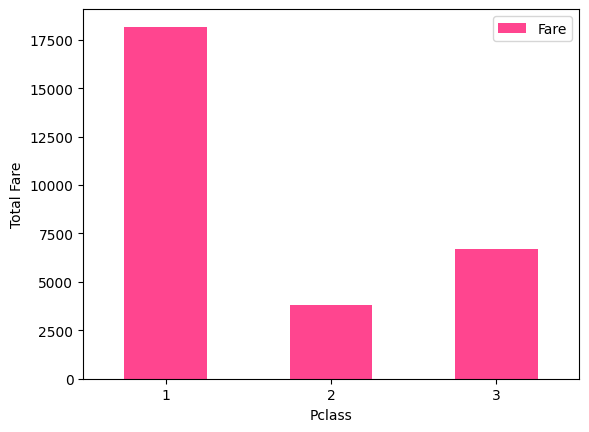

In [97]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar', color="#ff458f")
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()


<Axes: xlabel='Pclass', ylabel='Fare'>

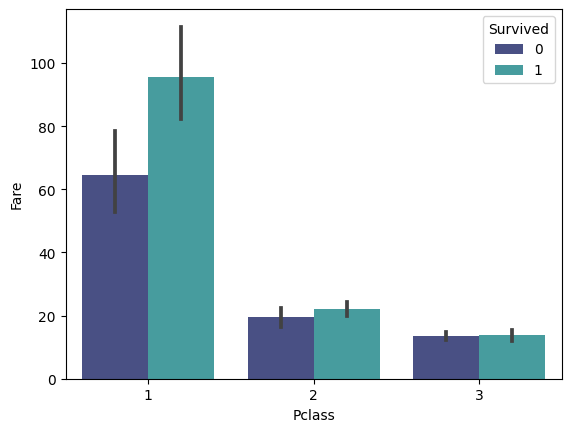

In [98]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived', palette='mako')

<Axes: xlabel='Survived', ylabel='Fare'>

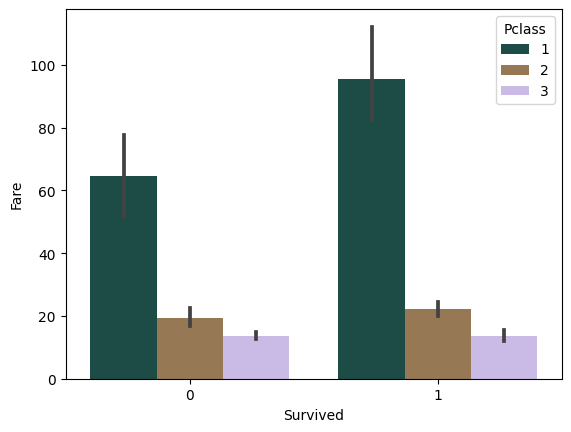

In [99]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass', palette='cubehelix')

# Data Preprocessing


In [100]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [102]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [103]:
df = df.drop(columns=['Cabin'], axis=1)

In [104]:
age = df['Age'].mean()

In [105]:
fare = df['Fare'].mean()

In [106]:
df['Age'] = df['Age'].fillna(age)
df['Fare'] = df['Fare'].fillna(fare)

In [107]:
embarked = df['Embarked'].mode()[0]

In [108]:
df['Embarked'] = df['Embarked'].fillna(embarked)

<Axes: xlabel='Fare', ylabel='Density'>

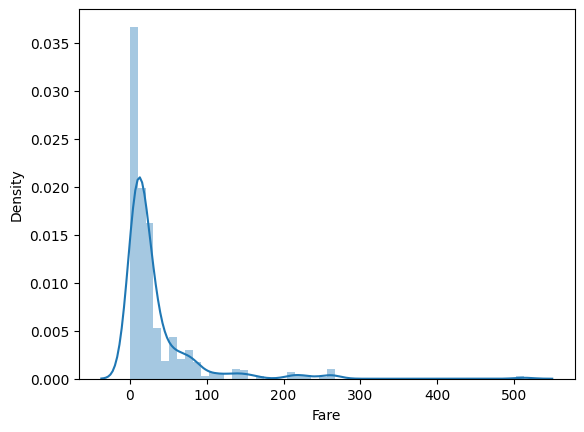

In [109]:
sns.distplot(df['Fare'])

In [110]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

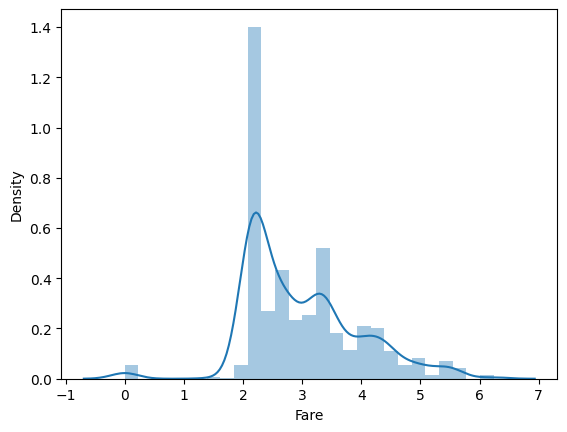

In [111]:
sns.distplot(df['Fare'])

# Correlation Matrix

<Axes: >

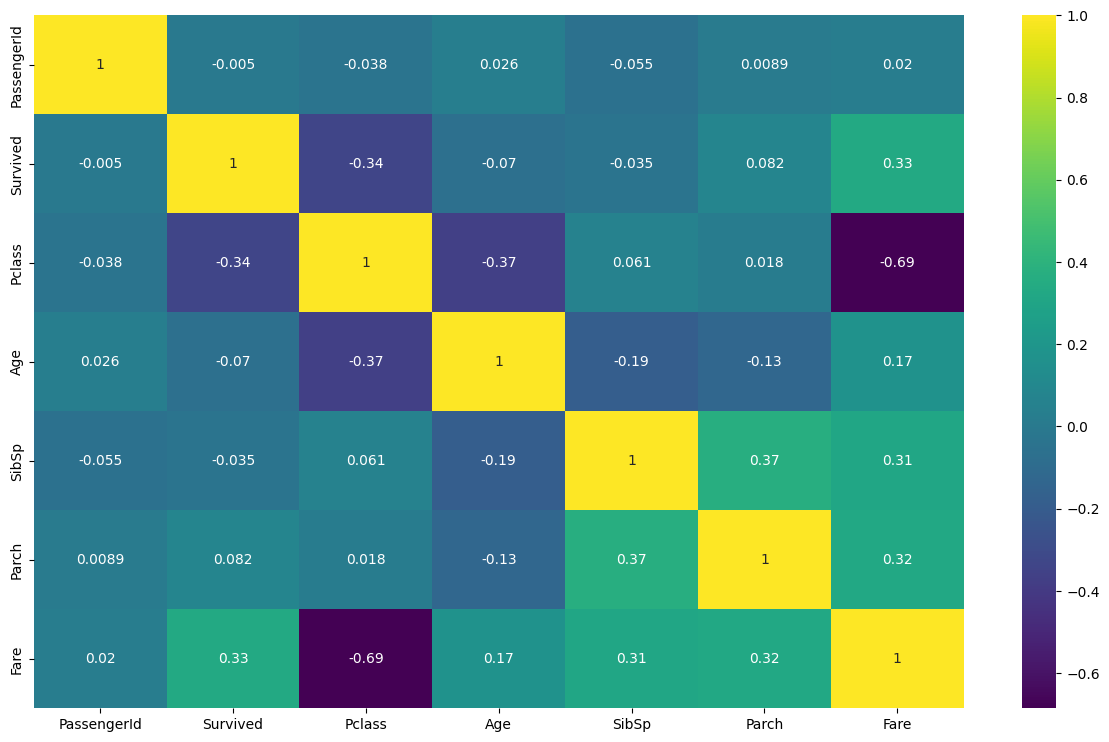

In [112]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='viridis')

In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [114]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


# Label Encoding

In [115]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


# Splitting test and train data

In [116]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [117]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [118]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [119]:
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
Y = train['Survived']

In [120]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Training

In [121]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, Y, cv=5)
    print('CV Score:', np.mean(score))

In [122]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


In [123]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7219730941704036
CV Score: 0.7778231121712385


In [124]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8116591928251121
CV Score: 0.8081225284037412


In [125]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7802690582959642
CV Score: 0.7991212102190697


In [126]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.8125980792166217


In [127]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

Accuracy: 0.8116591928251121
CV Score: 0.8238277572029377


In [128]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


# Model training with full data

In [129]:
model = LGBMClassifier()
model.fit(X, Y)

LGBMClassifier()

In [130]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [131]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [132]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

#Prediction

In [133]:
sub = pd.read_csv('gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [134]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [141]:
sub['Survived'] = pred.astype('int')

In [142]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
